In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
col = [
"Rented Bike count",
"Hour",
"Temperature",
"Humidity" ,
"Windspeed" ,
"Visibility",
"Dew point temperature" ,
"Solar radiation",
"Rainfall",
"Snowfall",
"Functional Day"
]
data = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"], axis=1)

In [3]:
data.columns = col

In [4]:
data.head()

,Rented Bike count,Hour,Temperature,Humidity,Windspeed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Functional Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df = pd.DataFrame(data)

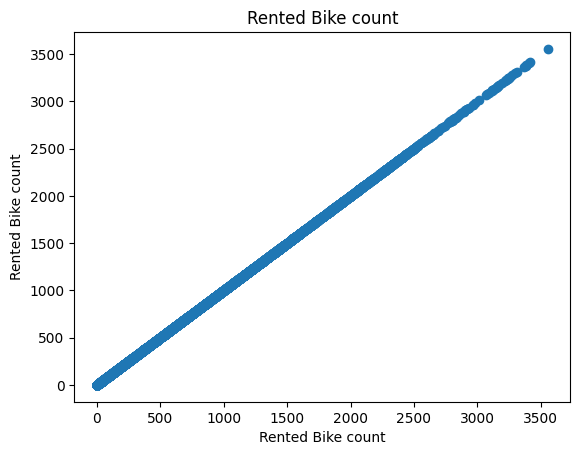

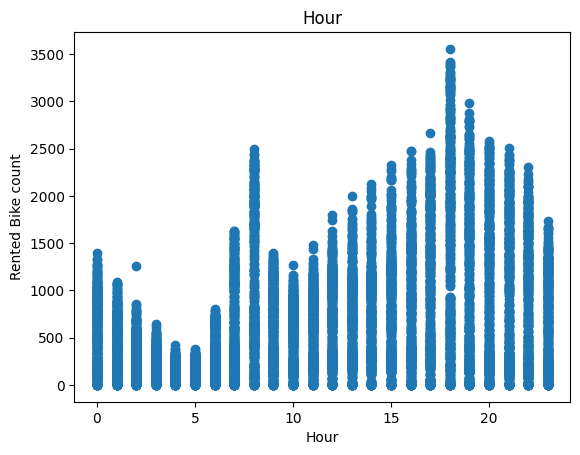

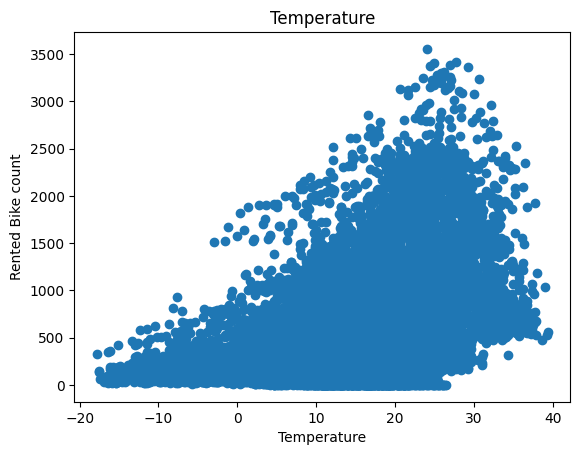

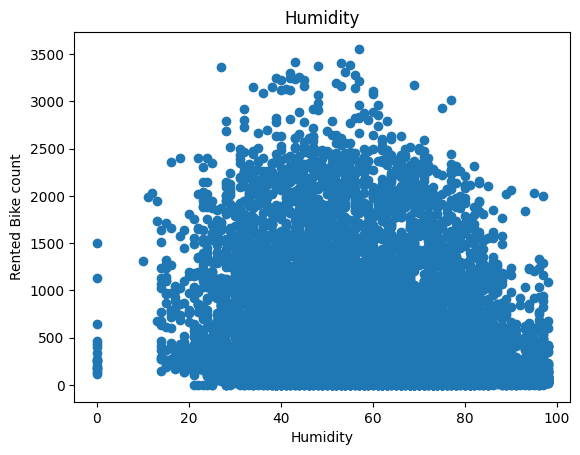

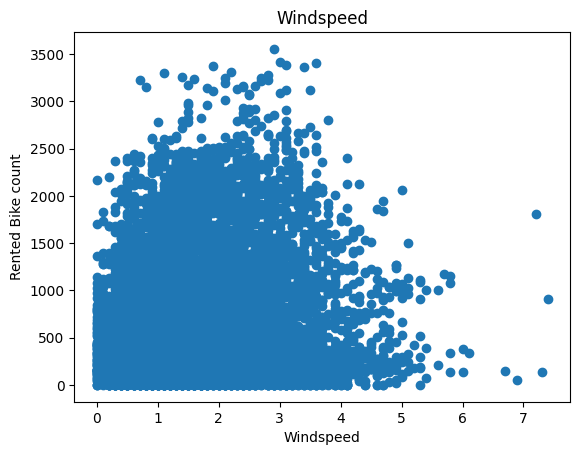

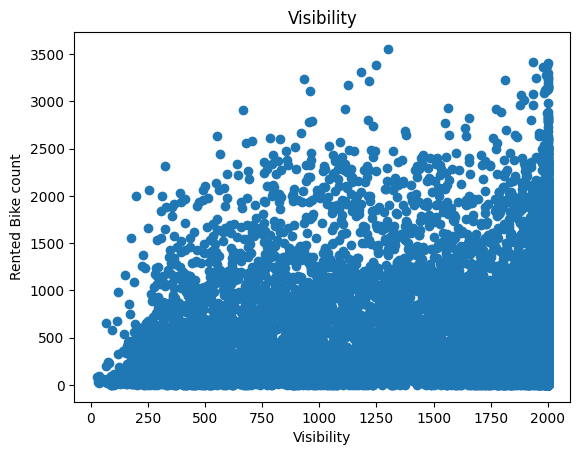

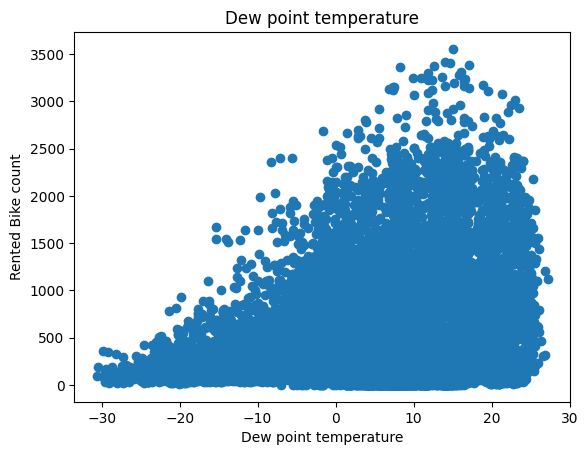

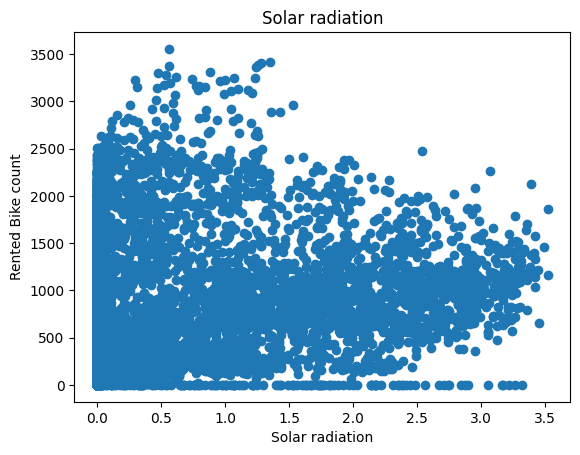

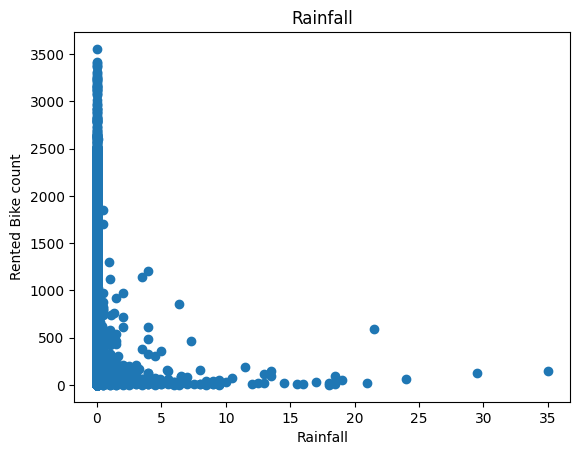

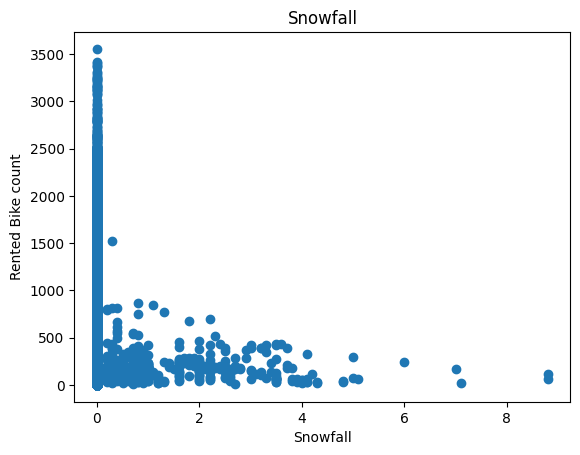

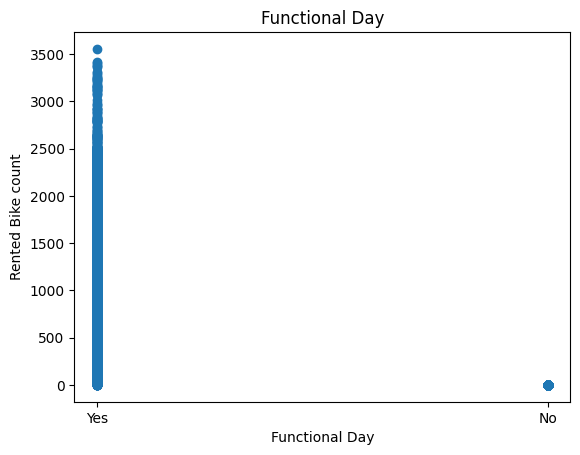

In [6]:
for label in df[1:]:
  plt.scatter(df[label], df['Rented Bike count'])
  plt.title(label)
  plt.ylabel('Rented Bike count')
  plt.xlabel(label)
  plt.show()

In [7]:
df = df.drop(["Visibility","Windspeed", "Functional Day" ], axis =1)

In [8]:
df.head()

,Rented Bike count,Hour,Temperature,Humidity,Dew point temperature,Solar radiation,Rainfall,Snowfall
0,254,0,-5.2,37,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,-18.6,0.0,0.0,0.0


In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c  for c in dataframe.columns if c !=y_label]].values
  else:
    if len(x_labels)==1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
        x= dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data, x,y

In [11]:
_,x_train, y_train = get_xy(train, "Rented Bike count", x_labels=["Temperature"])
_,x_valid, y_valid = get_xy(valid, "Rented Bike count", x_labels=["Temperature"])
_,x_test, y_test = get_xy(test, "Rented Bike count", x_labels=["Temperature"])

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(x_train, y_train)

LinearRegression()

In [13]:
print(temp_reg.coef_, temp_reg.intercept_)

[[28.17450185]] [335.63920207]


In [14]:
print(temp_reg.score(x_train, y_train))
print(temp_reg.score(x_valid, y_valid))
print(temp_reg.score(x_test, y_test))

0.28105905640530393
0.2968680021858119
0.3058166963304968


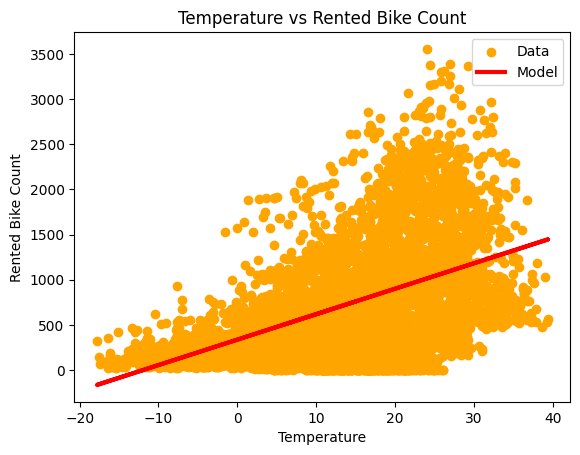

In [15]:
plt.scatter(x_train, y_train, label='Data', color='orange')
plt.plot(x_train, temp_reg.predict(x_train), label='Model', color='r', linewidth=3)
plt.legend()
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.show()

Multiple Linear Regression

In [16]:
df.columns

Index(['Rented Bike count', 'Hour', 'Temperature', 'Humidity',
       'Dew point temperature', 'Solar radiation', 'Rainfall', 'Snowfall'],
      dtype='object')

In [17]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_,x_train_multiple, y_train_multiple = get_xy(train, "Rented Bike count", x_labels=df.columns[1:])
_,x_valid_multiple, y_valid_multiple = get_xy(valid, "Rented Bike count", x_labels=df.columns[1:])
_,x_test_multiple, y_test_multiple = get_xy(test, "Rented Bike count", x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
reg_mul = LinearRegression()
reg_mul.fit(x_train_multiple, y_train_multiple)

LinearRegression()

In [19]:
print(reg_mul.coef_, reg_mul.intercept_)

[[ 27.39044611  26.36234079  -9.238017     5.65952321 -80.31852971
  -65.63022953  17.3056043 ]] [618.868572]


In [20]:
reg_mul.score(x_test_multiple,y_test_multiple)

0.4862761332824235

#Regression using Neural Network

In [22]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train.reshape(-1,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [24]:
temp_nn_model.compile(
    optimizer='adam',
    loss='mse'
)

In [37]:
history = temp_nn_model.fit(
    x_train, y_train,
    verbose=0,
    epochs =1000,
    validation_data=(x_valid, y_valid)
)


In [33]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()
  plt.grid(True)
  plt.show()

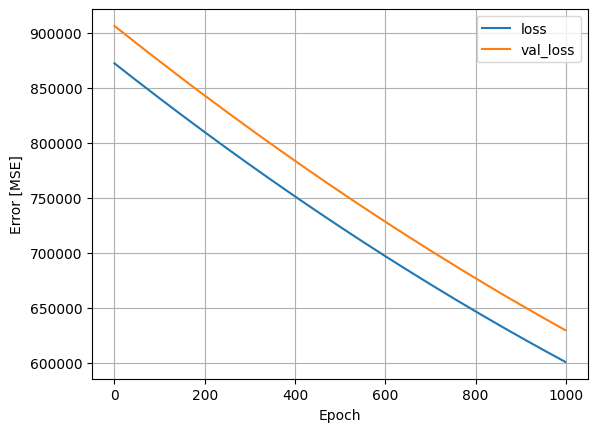

In [30]:
plot_loss(history)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


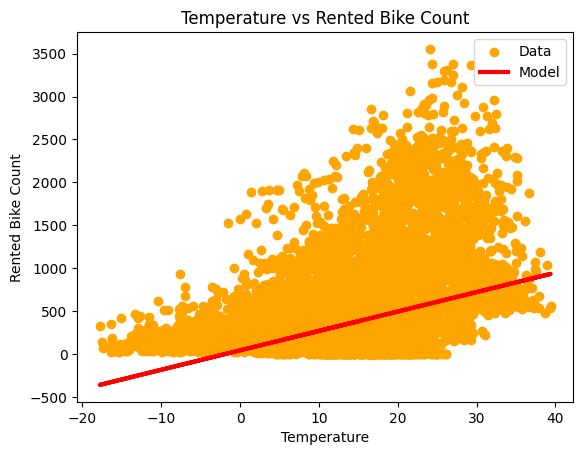

In [38]:
plt.scatter(x_train, y_train, label='Data', color='orange')
plt.plot(x_train, temp_nn_model.predict(x_train), label='Model', color='r', linewidth=3)
plt.legend()
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.show()

In [44]:
y_pred_nn = temp_nn_model.predict(x_test)
y_pred_reg = reg_mul.predict(x_test_multiple)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [42]:
mse = lambda x_pred, x_real: np.mean((x_pred - x_real)**2)

In [45]:
print(mse(y_pred_nn, y_test))
print(mse(y_pred_reg, y_test))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82798514.26309703
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
334787878.86280704


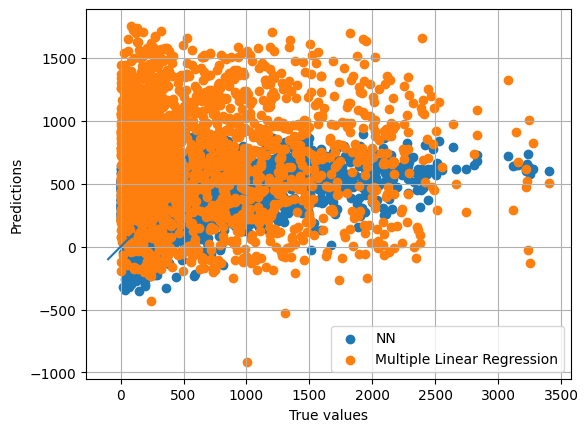

In [46]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_nn, label='NN')
plt.scatter(y_test, y_pred_reg, label="Multiple Linear Regression")
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
_ = plt.plot([-100, 100], [-100, 100])